In [1]:
import pandas as pd
import sys
sys.path.append("analysis/")
import merge_helpers
import graph_helpers
import cleaning_helpers
import warnings 
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
mpv_df = pd.read_csv('../raw_data/Mapping Police Violence.csv')
roster_df = pd.read_csv('../raw_data/36697-0001-Data.tsv', sep='\t')

## clean roster names in both datasets and filter to relevant dates in preparation for merge
mpv_df_collapsed = cleaning_helpers.clean_mpv_data(mpv_df, mpv_name_col="agency_responsible")
roster_df_cleaned = cleaning_helpers.clean_roster_data(roster_df, agency_name_col="NAME")

## Merge Mapping Police Violence (MPV) and Roster Datasets

In [3]:
# merge mpv and roster data on agency names and state
merged_df = merge_helpers.merge_on_names(
    mpv_df_collapsed, 
    roster_df_cleaned, 
    mpv_agency_col='mpv_agency_name', 
    roster_agency_col="roster_agency_name", 
    multi_agency_rule = 'all')

## Analysis

### Generate Table with Cumulative Shares of Officers / Police Killings

In [4]:
cumulative_table = graph_helpers.make_cumulative_table(
    merged_df, 
    roster_df_cleaned,
    bins = [1, 100, 200, 500, 1000, float('inf')],
    labels = ['1-99', '100-199', '200-499', '500-999', '1000+'],
    )

In [5]:
cumulative_table[['rost_size_cat', 'cumulative_share_officers', 'cumulative_share_killings']].rename(
        columns={
            'rost_size_cat': 'Number of Officers',
            'cumulative_share_officers': 'Cumulative Share of Officers',
            'cumulative_share_killings': 'Cumulative Share of Police Killings'
        }
    );

### Generate Plot with Proportion of Police Departments by Roster Size

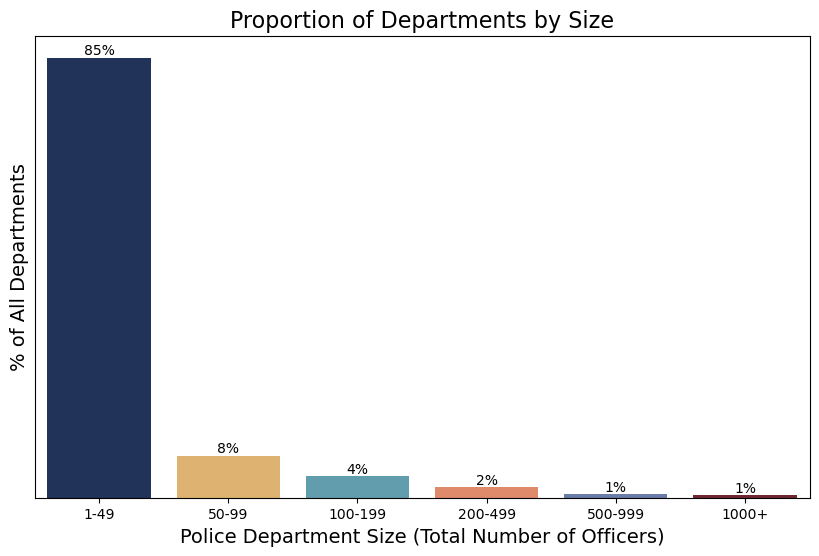

In [6]:
graph_helpers.make_roster_frequency_graph(roster_df_cleaned)

### Generate Plot Comparing Agency Sizes and Share of Police Killings

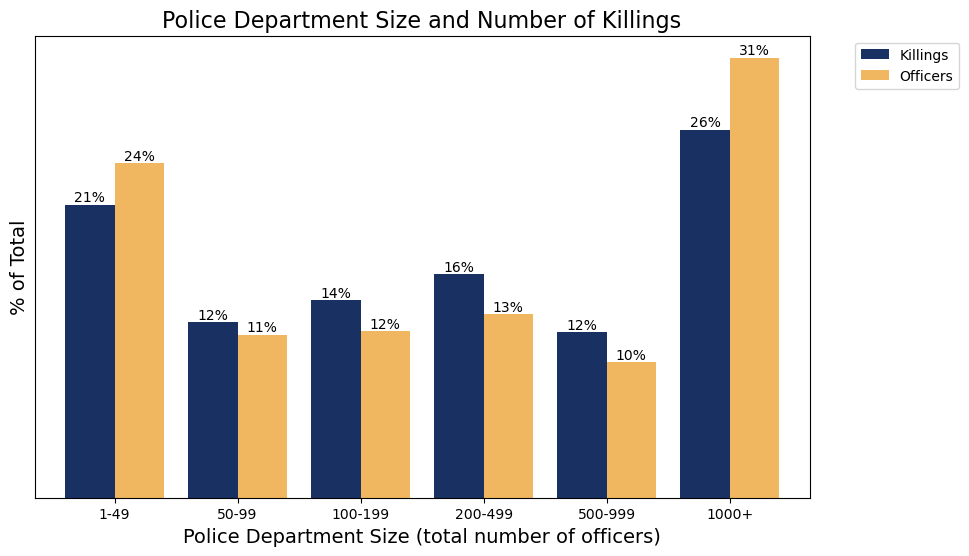

In [7]:
graph_helpers.make_bar_graph(merged_df, roster_df_cleaned, mpv_field = 'num_killings', roster_field = 'total_officers')